# Rain in France

In [18]:
# For multiple output per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
#!pip install pandas plotly -q

In [2]:
import pandas as pd
import plotly.graph_objects as go

In [3]:
DATASET_FOLDER = '../../datasets/'

In [4]:
past_time_series = ["1901-1930", "1931-1960", "1961-1990", "1901-2016", "1991-2016"]
futu_time_series = ["2020_2039", "2040_2059", "2060_2079", "2080_2099"]

df = pd.DataFrame()

for period in past_time_series:
    df_temp = pd.read_csv(f'{DATASET_FOLDER}/precipitation/historical_{period}_FRA_France.csv')
    df = df.append(df_temp)
df.head()

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,40.9290,1901,Jan Average,France,FRA
1,34.7865,1901,Feb Average,France,FRA
2,90.9714,1901,Mar Average,France,FRA
3,83.1600,1901,Apr Average,France,FRA
4,42.6287,1901,May Average,France,FRA


In [5]:
df.columns

Index(['Rainfall - (MM)', ' Year', ' Statistics', ' Country', ' ISO3'], dtype='object')

In [14]:
df_rain_per_year = df.groupby([' Year']).sum()

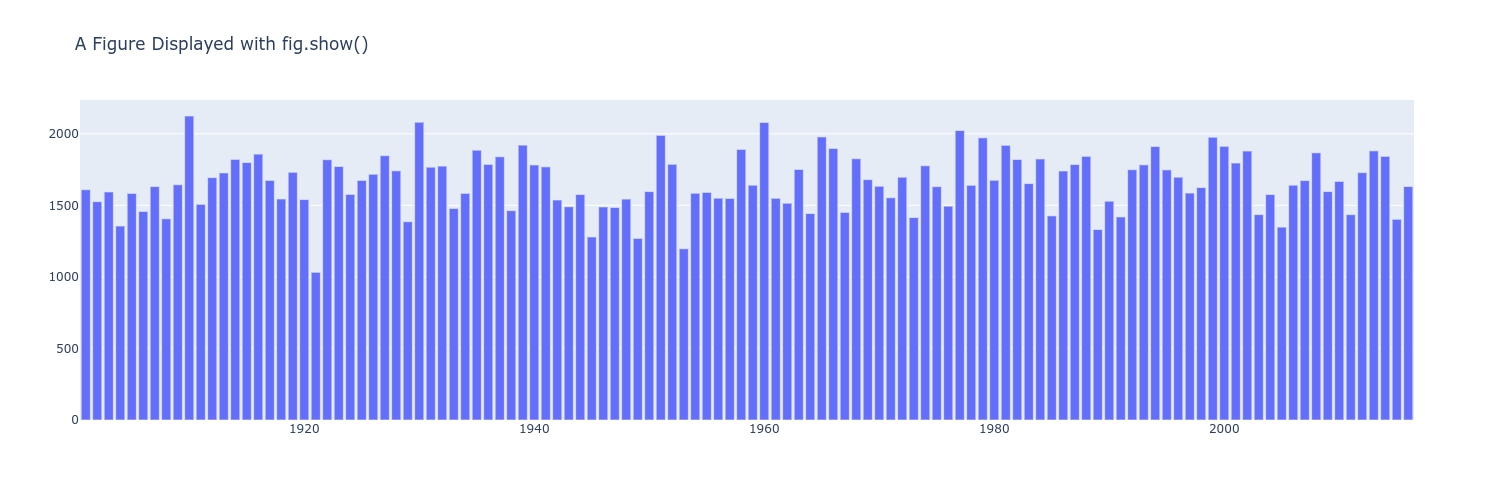

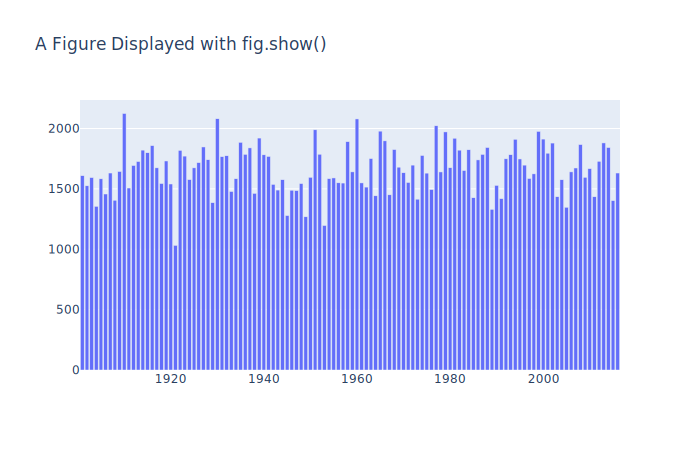

In [19]:
fig = go.Figure(
    data=[go.Bar(x=df_rain_per_year.index,y=df_rain_per_year['Rainfall - (MM)'])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.update_layout(autosize=True, width=1920, height=500) # For interactive plot
fig.show(renderer="svg") # Static plot for GitHub

In [7]:
df_futur = pd.read_csv('/media/NAS-Divers/dev/datasets/WorldBank/precipitation/projection_2080_2099_FRA_France.csv')
df_futur

,Monthly Precipitation - (MM),Year,Model,Statistics,Country,ISO3
0,89.675650,2080-2099,bcc_csm1_1,Jan Average,France,FRA
1,77.376030,2080-2099,bcc_csm1_1,Feb Average,France,FRA
2,73.125230,2080-2099,bcc_csm1_1,Mar Average,France,FRA
3,61.349895,2080-2099,bcc_csm1_1,Apr Average,France,FRA
4,45.782860,2080-2099,bcc_csm1_1,May Average,France,FRA
...,...,...,...,...,...,...
223,6.955004,2080-2099,Ensemble (90th Percentile),Aug Average,France,FRA
224,2.241972,2080-2099,Ensemble (90th Percentile),Sep Average,France,FRA
225,11.219088,2080-2099,Ensemble (90th Percentile),Oct Average,France,FRA
226,26.227331,2080-2099,Ensemble (90th Percentile),Nov Average,France,FRA


In [8]:
df_futur.columns

Index(['Monthly Precipitation - (MM)', ' Year', ' Model', ' Statistics',
       ' Country', ' ISO3'],
      dtype='object')

In [9]:
df_futur.columns = ['Precipitation', 'Year', 'Model', 'Statistics', 'Country', 'ISO3']

In [10]:
df_futur['Model'].value_counts().keys()

Index([' miroc5', ' miroc_esm_chem', ' bcc_csm1_1', ' miroc_esm',
       ' cesm1_cam5', ' bcc_csm1_1_m', ' fio_esm', ' ipsl_cm5a_mr',
       ' giss_e2_r', ' Ensemble (10th Percentile)', ' ccsm4', ' csiro_mk3_6_0',
       ' mri_cgcm3', ' gfdl_cm3', ' Ensemble (90th Percentile)', ' noresm1_m',
       ' Ensemble (50th Percentile)', ' gfdl_esm2m', ' giss_e2_h'],
      dtype='object')

In [11]:
df_futur_ipsl = df_futur[df_futur['Model'] == ' ipsl_cm5a_mr']
df_futur_ipsl

,Precipitation,Year,Model,Statistics,Country,ISO3
120,117.995950,2080-2099,ipsl_cm5a_mr,Jan Average,France,FRA
121,98.691710,2080-2099,ipsl_cm5a_mr,Feb Average,France,FRA
122,90.663600,2080-2099,ipsl_cm5a_mr,Mar Average,France,FRA
123,55.801178,2080-2099,ipsl_cm5a_mr,Apr Average,France,FRA
124,30.423563,2080-2099,ipsl_cm5a_mr,May Average,France,FRA
125,20.868807,2080-2099,ipsl_cm5a_mr,Jun Average,France,FRA
126,26.549425,2080-2099,ipsl_cm5a_mr,Jul Average,France,FRA
127,20.579355,2080-2099,ipsl_cm5a_mr,Aug Average,France,FRA
128,30.105513,2080-2099,ipsl_cm5a_mr,Sep Average,France,FRA
129,58.422195,2080-2099,ipsl_cm5a_mr,Oct Average,France,FRA


In [12]:
df_futur_ipsl.Precipitation.sum()

786.972526

noresm1_m = The Norwegian Earth System Model
ipsl_cm5a_mr = Institut Pierre Simon Laplace Model CM5A-MR http://www.glisaclimate.org/node/2219

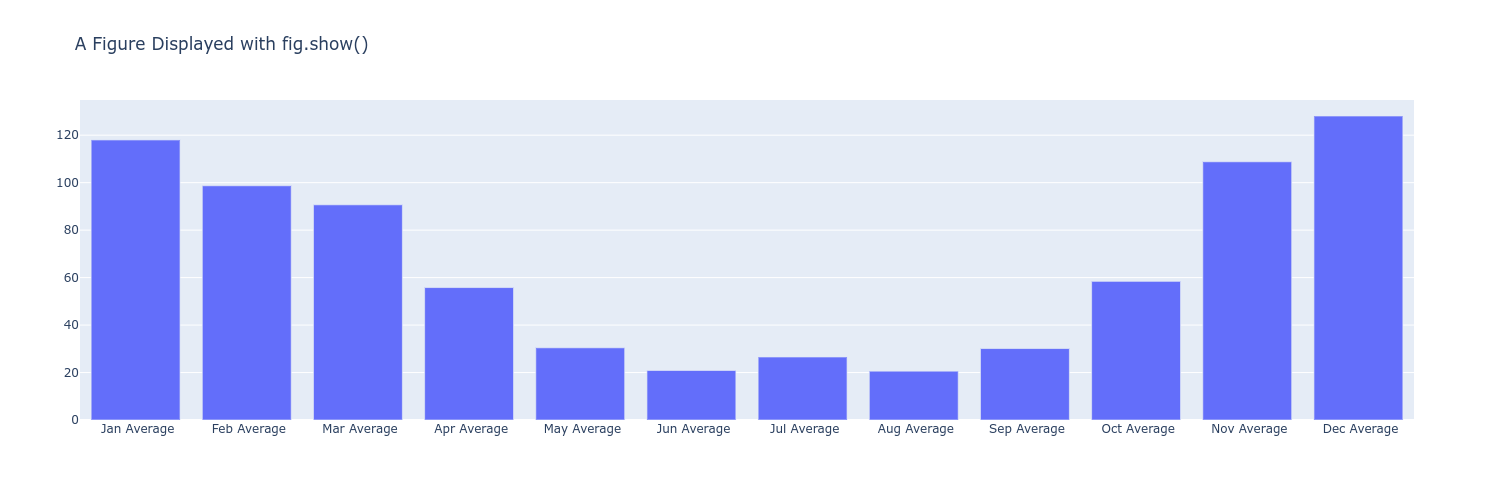

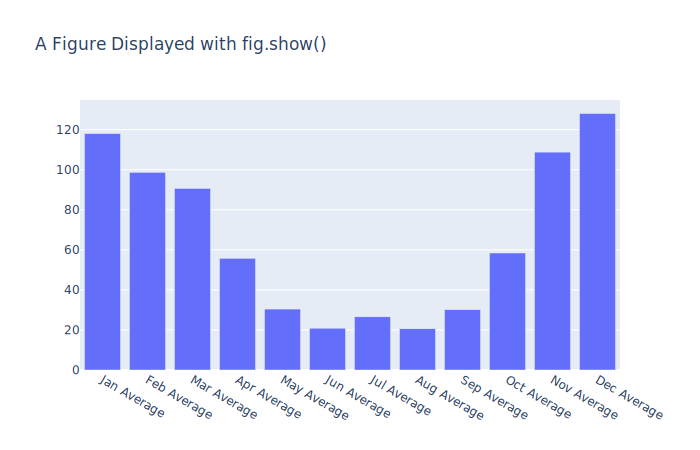

In [20]:
fig = go.Figure(
    data=[go.Bar(x=df_futur_ipsl['Statistics'],y=df_futur_ipsl['Precipitation'])],
    layout_title_text="A Figure Displayed with fig.show()"
)
fig.update_layout(autosize=True, width=1920, height=500) # For interactive plot
fig.show(renderer="svg") # Static plot for GitHub